In [32]:
#1 import the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
#2 Read the training and test data into respective variables

train = pd.read_csv("trainT.csv")
test = pd.read_csv("testT.csv")

In [5]:
train.head()
# test.head()
# here Survuved is the output variable -> y

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [7]:
#4 Choose some of the variables

df = train[['Survived', 'Pclass' , 'Sex' , 'Age' , 'Fare']]

In [10]:
#5 Encoding Gender values to 0 , 1

# one way of doing it
# df['Sex'] = df['Sex'].map({'male': 0 , 'female': 1})

#another way of doing this
df['Sex'] = df['Sex'].apply(lambda sex:1 if sex == 'male' else 0)
df.head()

C:\Users\harsh\anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


,Survived,Pclass,Sex,Age,Fare
0,0,3,0,22.0,7.2500
1,1,1,0,38.0,71.2833
2,1,3,0,26.0,7.9250
3,1,1,0,35.0,53.1000
4,0,3,0,35.0,8.0500


In [11]:
# handling Missing values -> Data Inputation
# fillna -> is the function which is used to fill the Cells with value NaN
df['Age'] = df["Age"].fillna(df["Age"].median()) # median is robust to outliers

C:\Users\harsh\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [12]:
df.head()

,Survived,Pclass,Sex,Age,Fare
0,0,3,0,22.0,7.2500
1,1,1,0,38.0,71.2833
2,1,3,0,26.0,7.9250
3,1,1,0,35.0,53.1000
4,0,3,0,35.0,8.0500


In [13]:
#7 Set the predictor and response variables
X = df.drop("Survived" ,  axis = 1)
Y = df["Survived"]

In [19]:
# split the data into training and test sets
from sklearn.model_selection import train_test_split

X_train , X_test , Y_train , Y_test = train_test_split(X , Y , test_size = 0.3 , random_state = 25 , stratify = Y)

In [21]:
#9 The Logistic Regression Model

from sklearn.linear_model import LogisticRegression

logit = LogisticRegression()
logit.fit(X_train , Y_train)

LogisticRegression()

In [23]:
X_train.head()

,Pclass,Sex,Age,Fare
468,3,0,28.0,7.725
170,1,0,61.0,33.500
150,2,0,51.0,12.525
47,3,0,28.0,7.750
822,1,0,38.0,0.000


In [25]:
#10 Y Predictions 
Y_pred = logit.predict(X_test)

In [27]:
#11 Confusion Matrix
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(Y_test , Y_pred)
confusion_matrix
# this matrix is 2*2 matrix
# one row for one class
# did not survive and survive

# [did not survive and y = yhat          did not survive and y != yhat]
# [survive and y != yhat                 survive and y == yhat]

# like TP -> true positive , FP -> false Positive -> true value as Positive but predicted as negative
#      FN -> false Negative -> true value as Negative but predicted as Positive , TN -> true Negative

array([[137,  28],
       [ 51,  52]], dtype=int64)

In [28]:
#12 Accuracy score is also a matrix -> 1*1
# no of correct values / total
from sklearn.metrics import accuracy_score
accuracy_score(Y_test , Y_pred)

0.7052238805970149

In [30]:
#13 classification Report
from sklearn.metrics import classification_report
report = classification_report(Y_test , Y_pred)
print(report)
# support represents the number that are actually classified to be 0 and classified to be 1
# f1-score -> product of precision and recall divided by (precission + recall)
# f1-score -> (pres*recall)/(pres+recall)

# precission = (true positive) / (true Positive + false Positive)
# recall = (true Negative) / (true Negative + false Negative) ( not sure about this)

              precision    recall  f1-score   support

           0       0.73      0.83      0.78       165
           1       0.65      0.50      0.57       103

    accuracy                           0.71       268
   macro avg       0.69      0.67      0.67       268
weighted avg       0.70      0.71      0.70       268



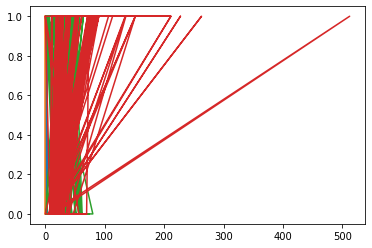

In [33]:
plt.plot(X_test , Y_pred)